# XArray - Selecting Data
This notebook follows the the `Explore-nc-file.ipynb` with a focus on methods for selecting data from Xarray datasets.

## Background
In the last notebook we discussed the structure of Xarray datasets: attributes, variables, and dimensions. We saw how we could extract specific variables into data array objects and a bit on how to reveal properties of datasets and data arrays. Here, we leverage that knowledge to examine methods of extracting, summarizing, and visualizing data stored in these object.  

Additional information is found here: https://docs.xarray.dev/en/stable/user-guide/indexing.html

In [1]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# Set path to nc filed and import as an xarray dataset, then show the dataset object
ds = xr.open_dataset("U:\859_data\multi_reanal.partition.med_10m.197901.nc")
ds

<xarray.Dataset> Size: 8GB
Dimensions:                  (date: 745, longitude: 301, latitude: 109,
                              partition: 11)
Coordinates:
  * date                     (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude                (longitude) float32 1kB -7.0 -6.833 ... 42.83 43.0
  * latitude                 (latitude) float32 436B 30.0 30.17 ... 47.83 48.0
  * partition                (partition) int32 44B -2147483647 ... -2147483647
Data variables:
    depth                    (latitude, longitude) float32 131kB ...
    wind_speed               (date, latitude, longitude) float32 98MB ...
    wind_direction           (date, latitude, longitude) float32 98MB ...
    current_speed            (date, latitude, longitude) float32 98MB ...
    current_direction        (date, latitude, longitude) float32 98MB ...
    significant_wave_height  (date, partition, latitude, longitude) float32 1GB ...
    peak_period              (date, partition, latitude, longitude) timedelta64[ns] 2GB ...
    wavelength               (date, partition, latitude, longitude) float32 1GB ...
    wave_direction           (date, partition, latitude, longitude) float32 1GB ...
    direction_spreading      (date, partition, latitude, longitude) float32 1GB ...
    wind_sea_fraction        (date, partition, latitude, longitude) float32 1GB ...
Attributes:
    title:          WAVEWATCH III version 5.08
    institution:    National Centers for Environmental Prediction
    source:         WAVEWATCH III partition file
    experiment:     CFSRR Phase 2
    history:        part2nc
    field_type:     instantaneous
    forecast_type:  hindcast

---
## Selecting data from the dataset
Now we'll look into how to extract, and in some cases summarize data in our dataset. First, we'll look at how to isolate and examine a single variable in our dataset. Then we'll see how we can extract values by index *position* along the different dimensions, and finally how to extract values by index *values* along the different dimensions.

### 🔍Isolating data for a specific specific *variable*
We can subset our Xarray dataset for just values related to a specific variable by calling that variable as so:

In [ ]:
#List the variables in the dataset [Review]
ds.data_vars

Data variables:
    depth                    (latitude, longitude) float32 131kB ...
    wind_speed               (date, latitude, longitude) float32 98MB ...
    wind_direction           (date, latitude, longitude) float32 98MB ...
    current_speed            (date, latitude, longitude) float32 98MB ...
    current_direction        (date, latitude, longitude) float32 98MB ...
    significant_wave_height  (date, partition, latitude, longitude) float32 1GB ...
    peak_period              (date, partition, latitude, longitude) timedelta64[ns] 2GB ...
    wavelength               (date, partition, latitude, longitude) float32 1GB ...
    wave_direction           (date, partition, latitude, longitude) float32 1GB ...
    direction_spreading      (date, partition, latitude, longitude) float32 1GB ...
    wind_sea_fraction        (date, partition, latitude, longitude) float32 1GB ...

In [24]:
#Select only current speed records into a data array object
da_windspeed = ds['wind_speed']
da_windspeed

<xarray.DataArray 'wind_speed' (date: 745, latitude: 109, longitude: 301)> Size: 98MB
[24442705 values with dtype=float32]
Coordinates:
  * date       (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0
Attributes:
    units:    meters/sec

### 🔍Position-based selection with `.isel()`
Now, we'll focus on working with data in a data array. 

We'll begin with the `.isel()` function. This functions allows us to select values from our dataset via their *integer position* along each dimension. For, example, the value in the `wind_speed` variable at the 5th positition along the `date` axis, the 63rd position along the `latitude` axis, the 68th position along the `longitude` axis and in the 1st `partition` is **14.3 m/s**. (Note, the `values` statement returns the value(s) held in the array.)

>How do we know the value is in m/s? Have a look at the data array object: it reports the units...

In [27]:
#Show the value at the 5th date, 63rd latitude, 68th longitude, 1st partition
da_windspeed.isel(
    date=4,
    latitude=62,
    longitude=67
).values

array(14.3, dtype=float32)

If we omit any of the dimensions (or just comment them out), the `isel()` function will return all values in the ommitted dimension.  

Here by ommitting the date selection, we retrieve all wind speed records for the 63rd record in the latitude dimension, 68th record in the longitude dimension. 

In [ ]:
#Extract the values at the 63rd latitude, 68th longitude, all partition into a variable
time_series = da_windspeed.isel(
    #date = 1,
    latitude=62,
    longitude=67, 
).values
#Reveal those values (the first 20)
time_series[:20]

array([10.4, 12.5, 13. , 13.4, 14.3, 15.3, 14.7, 15.7, 15.6, 16. , 16.8,
       17.5, 15.7, 15.1, 15.5, 14.6, 12.3, 11.2, 11.9, 12.1],
      dtype=float32)

In other words, we have a time series of wind speed for a particular location, which we can plot.

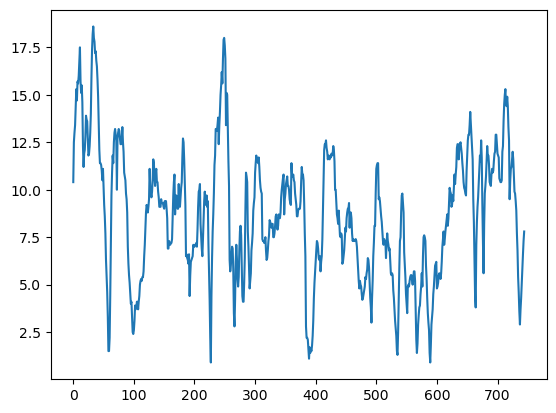

In [33]:
plt.plot(time_slice);

Likewise, if we omit the spatial coordinates in our selection code, we get data along all the lat/long pairs for a set time and partition, i.e., a spatial dataset which we can plot.

In [34]:
#Save the value at the 5th date, 1st partition, all latitudes and longitudes to a variable
spatial_slice = da_windspeed.isel(
    date = 4,
    #latitude=62,
    #longitude=67
).values

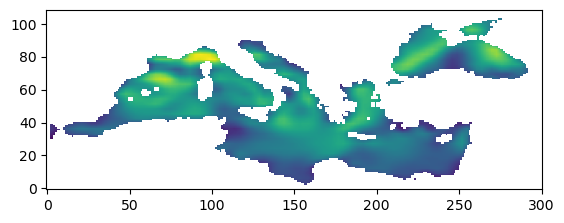

In [40]:
#Plot the 2D array
plt.imshow(spatial_slice, origin='lower');

We can also request multiple values along a dimension by providing a list of indices:

In [43]:
#Show the value at the 5th & 8th date, 63rd latitude, 68th longitude, 1st & 2nd partition
da_windspeed.isel(
    date = [4,7,10],
    latitude=63,
    longitude=68,
).values

array([15.7, 17.5, 18. ], dtype=float32)

And we can extract a slice of values using the range function:

In [45]:
#Show the value at the 5th & 8th date, 63rd latitude, 68th longitude, 1st & 2nd partition
da_windspeed.isel(
    date = range(4,8),
    latitude=63,
    longitude=68,
).values

array([15.7, 16.7, 16.1, 17.5], dtype=float32)

---
### 🔍Label based selection with `.sel()`
Selecting by index location is effective, but we often want to select values by index *values*: a specific time or time range, or a specific location or geographic area. We can do that with the `.sel()` function, but doing so requires us to know the values and formats of our indexes, i.e., the *coordinate variables*.  Some coordinate variables are intuitive, like values in the `date` dimension, but others may require more knowledge of the datasets structure.  

#### Revealing the index values among the dimensions
We'll start with a review on how to work with coordinate variables, revealing their names, values, and value types. 


In [50]:
#Reveal the coordinate variables in our data array
da_windspeed.coords

Coordinates:
  * date       (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01
  * longitude  (longitude) float32 1kB -7.0 -6.833 -6.667 ... 42.67 42.83 43.0
  * latitude   (latitude) float32 436B 30.0 30.17 30.33 ... 47.67 47.83 48.0

In [54]:
#Examine the coordinate variables for the `date` dimension
date_coords = da_windspeed.coords['date']
date_coords

<xarray.DataArray 'date' (date: 745)> Size: 6kB
array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ..., '1979-01-31T22:00:00.000000000',
       '1979-01-31T23:00:00.000000000', '1979-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 6kB 1979-01-01 ... 1979-02-01

In [55]:
#Show the min and max values date in the date dimension
print(date_coords.values.min(), date_coords.values.max())

1979-01-01T00:00:00.000000000 1979-02-01T00:00:00.000000000


A more efficient method of generating summary stats of index values along a dimension is to convert the values to a Pandas dataframe and then use the `describe()` function.

In [56]:
#Generate summary stats via Pandas' dataframe
pd.DataFrame(date_coords.values).describe()

,0
count,745
mean,1979-01-16 12:00:00
min,1979-01-01 00:00:00
25%,1979-01-08 18:00:00
50%,1979-01-16 12:00:00
75%,1979-01-24 06:00:00
max,1979-02-01 00:00:00


Looking at the date index values, we see they are datetime objects of hourly increments from midnight Jan 1, 1979 to midnight Feb 1, 1979.

Let's now get the range of values for each spatial dimension...

In [ ]:
#Create coordinate data arrays
lat_coords = da_windspeed.coords['latitude']
lng_coords = da_windspeed.coords['longitude']

#Compute 
print(lat_coords.values.min(), lat_coords.values.max())
print(lng_coords.values.min(), lng_coords.values.max())

30.0 48.0
-7.0 43.0


We have a few ways of selecting values. First is to provide exact value that occur in our set of coordinate variables. For example, the wind speed was at 3pm on Jan 11th, 1979 at 37°N, 3°E was 10.8 m/s.

In [76]:
#Select wind speed at 3pm (1500 hours) Jan 1, 1979 data for 37°N, 3°E
da_windspeed.sel(
    date='Jan 01, 1979 15:00', 
    latitude = 37,
    longitude = 3
    )
#Show the result
jan_1st.values, jan_1st.units

(array(10.8, dtype=float32), 'meters/sec')

Now we can select records based on values rather than indices. Below is code to grab all hourly wind-speed records for Jan 01, 1979 at specific coordinate pair

In [ ]:
#Select all Jan 1, 1979 data for 37°N, 3°E
jan_1st = da_windspeed.sel(
    date='Jan 01, 1979',
    latitude = 37,
    longitude = 3
    )
#Show the result
jan_1st.values

array(10.8, dtype=float32)

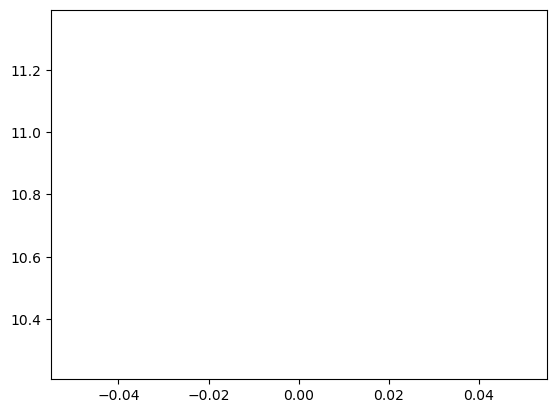

In [73]:
#Plot the values
plt.plot(jan_1st.values);

In [ ]:
#Select all Jan 1, 1979 data for 37°N, 3°E
jan_1st = da_windspeed.sel(
    date='Jan 01, 1979',
    latitude = 37,
    longitude = 3
    )
#Show the result
jan_1st

We can adjust our code to select a range, or **slice**, of values. 